## Graph data structure
## Copyright: Jagadeesh Vasudevamurthy
## filename:graph.ipynb¶

# All import here

In [1]:
import sys # For getting Python Version
import os
import enum # For enum
import math  # for infinity
from graphviz import Source
print("Version of Python I am using is", sys.version)

Version of Python I am using is 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]


# Graph input and output directory setup
# YOU MUST CHANGE 2 lines below

In [2]:
inputFileBase = "C:\\Users\\ruchi\\Coursework\\PSA\\Assignments\\AssignmentGraph\\graphdata\\"
outputFileBase = "C:\\Users\\ruchi\\Coursework\\PSA\\Assignments\\AssignmentGraph\\dot\\" 

In [3]:
def read_dot_file(f:'string')->'dot_graph':
    filename = outputFileBase + f + ".dot"
    print(filename)
    with open(filename) as f1:
        dot_graph = f1.read()
    print(dot_graph)
    return(dot_graph)

# YOU WRITE CODE BELOW

# Graph builder from file

In [4]:
############################################################
# GraphBuilder.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType
#from GraphInterface import *  ##User UDT

class GraphBuilder:
    def __init__(self, g: "graph", f: "string"):
        self._g = g
        # graph object
        self._f = f  # File from which you are building graph
        self._g._g = self._build_graph()

    ############################################################
    # Write code: build_graph
    # Use as many private functions and prvate data you want
    ###########################################################
    # Time Complexity: O(E)
    # Space Complexity: O(V + E)
    def _build_graph(self) -> "None":
        notReadline = 0
        readline = 0
        with open(self._f, "r") as file:
            data = file.readlines()
            for aline in data:
                token = aline.split()
                size = len(token)
                if (size < 2) or (size > 3):
                    notReadline = notReadline + 1
                    print("NOT READ LINE", aline)
                    continue
                readline = readline + 1
                tf = token[0]
                tt = token[1]
                if (tf == tt):
                  notReadline = notReadline + 1
                  print("NOT READ LINE", aline)
                  continue ;
                #WRITE CODE BELOW
                 # w: edges's weight
                w = 0
                if (size == 3):
                    tw = float(token[2])
                    w = float(tw)
                n1 = self._g._data_interface.insert(Data(tf))
                n2 = self._g._data_interface.insert(Data(tt))
                # Adds edge between from_node: n1 and to_node: n2 with weight: w
                self._g.add_edge(n1, n2, w)


# Write Graph as a dot file

In [5]:
############################################################
# GraphDot.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# YOU WRITE CODE IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType


class GraphDot:
    def __init__(self, g, f):
        self._g = g  # Handle to graph
        self._f = f  # File where you write graph in dot format
        self._of = open(self._f, "w")
        self._write_dot()
        self._of.close()

    ############################################################
    # Write code: _write_dot
    # Use as many private functions and prvate data you want
    ###########################################################
    # Time Complexity: O(V + E)
    # Space Complexity: O(V)
    def _write_dot(self):
        # Write Header
        self._of.write("digraph G {\n")

        # Write Edge
        self._of.write("edge [")
        # Write Edge Attributes
        if (self._g.is_undirected_graph()):
            self._of.write("dir=none, ")     
        self._of.write("color=red];\n")
        # Write Edges
        list_of_nodes = self._g.list_of_nodes()
        # Visited keeps track of edges that have already been written
        visited = {}
        for from_node in list_of_nodes:
            from_node_num = from_node.get_num()
            from_node_real_data = self._g.get_real_name(from_node_num)
            visited[from_node_num] = set()
            for egde in from_node.all_fanout_edges_of_a_node():
                to_node = egde.get_other_node()
                to_node_num = to_node.get_num()
                # If undirected graph, check if edge has already been written
                if self._g.is_undirected_graph() and to_node_num in visited and from_node_num in visited[to_node_num]:
                    continue
                visited[from_node_num].add(to_node_num)
                to_node_real_data = self._g.get_real_name(to_node_num)
                weight = egde.get_weight()
                self._of.write(from_node_real_data + " -> " + to_node_real_data)
                if (self._g.is_weighted_graph()):
                    self._of.write(" [label = " + str(weight) + "]")
                self._of.write(";\n")   

        # Write Footer
        self._of.write("}\n")
    


# DFS USING TIME STAMP

In [6]:

############################################################
# GraphDfs.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType
#from Graph import *

############################################################
# Depth First serach using TimeStamp
###########################################################

# TimeStamp keeps track of the time when a node is entered (in) and exited (out)
class Timestamp:
    def __init__(self):
        self._in = 0
        self._out = 0

    def get_in_time(self):
        return self._in

    def get_out_time(self):
        return self._out
    
    def set_in_time(self, time):
        self._in = time
    
    def set_out_time(self, time):
        self._out = time

class GraphDfsUsingTimeStamp:
    def __init__(
        self,
        g: "graph",
        graph_name: "string",
        dfs_order: "list of Nodes",
        has_loop: "list of size 1",
        work: "list of size 1",
        dfs_traversal_output_file,
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._graph_name = graph_name
        self._dfs_order = dfs_order
        self._has_loop = has_loop
        self._has_loop[0] = False
        self._work = work
        self._work[0] = 0
        self._dfs_traversal_output_file = dfs_traversal_output_file

        # _unvisited_nodes keeps track of nodes that have not been visited
        self._unvisited_nodes = set()
        # _node_timestamps keeps track of the in & out timestamps of each node
        self._node_timestamps = {}
        # Initialize _unvisited_nodes and _node_timestamps
        list_of_nodes = self._g.list_of_nodes()
        for node in list_of_nodes:
            self._unvisited_nodes.add(node)
            self._node_timestamps[node.get_num()] = Timestamp()
        # Initialize time
        self._time = 0    

        self._of = open(self._dfs_traversal_output_file, "w")

        ##YOU CAN has any number of private varibles and funcions
         ### MUST WRITE 2 routine for 100 Marks
        self._dfs()
        self._write_dot()

        self._of.close()

    # Check if node has been entered during traversal
    def has_node_been_entered(self, node):
        node_timestamp = self._node_timestamps[node.get_num()]
        return node_timestamp.get_in_time() != 0
    
    # Check if node has been exited during traversal
    def has_node_been_exited(self, node):
        node_timestamp = self._node_timestamps[node.get_num()]
        return node_timestamp.get_out_time() != 0
    
    # Increment time, set node's in time, and remove node from unvisited_nodes if it exists
    def _enter_node(self, node):
        self._time += 1
        self._node_timestamps[node.get_num()].set_in_time(self._time)
        self._unvisited_nodes.discard(node)

    # Increment time, set node's out time, and append node to dfs_order
    def _exit_node(self, node):
        self._time += 1
        self._node_timestamps[node.get_num()].set_out_time(self._time)
        self._dfs_order.append(node)
    
    # Time Complexity: O(V + E)
    # Space Complexity: O(V)
    def _dfs(self):
        prev_node = None
        # Perform DFS on all unvisited nodes, since any node can be a starting node
        while (len(self._unvisited_nodes) > 0):
            node = self._unvisited_nodes.pop()
            self._dfs_visit(node, prev_node)
        # Reverse dfs_order to get correct order, since we are appending nodes in exit order
        self._dfs_order.reverse()

    # Time Complexity: O(V + E)
    # Space Complexity: O(V)
    def _dfs_visit(self, node, prev_node):
        self._work[0] += 1
        # Node has been visited before, so check if there is a loop
        if self.has_node_been_entered(node):
            # If node has not been exited, then there is a loop
            if not self.has_node_been_exited(node):
                self._has_loop[0] = True
        # Node has not been visited before, so visit it
        else:
            self._enter_node(node)
            # Visit all fanout nodes of the current node
            fanout_edges = node.all_fanout_edges_of_a_node()
            for edge in fanout_edges:
                next_node = edge.get_other_node()
                # If undirected graph, skip traversing back to the previous node
                if self._g.is_undirected_graph and next_node == prev_node:
                    continue
                self._dfs_visit(next_node, node)
            self._exit_node(node)

    # Time Complexity: O(V + E)
    # Space Complexity: O(V + E)
    def _write_dot(self):
        self._write_dot_header()
        self._write_dot_nodes()
        self._write_dot_edges()
        self._write_dot_footer()

    def _write_dot_header(self):
        self._of.write("digraph G {\n")
    
    def _write_dot_footer(self):
        self._of.write("}\n")

    # Time Complexity: O(V)
    # Space Complexity: O(1)
    def _write_dot_nodes(self):
        # Write DFS Order & whether graph has loop
        isLoopString = "LOOP" if self._has_loop[0] else "NO LOOP"
        self._of.write("\tlabel = \"[")
        for node in self._dfs_order:
            node_num = node.get_num()
            node_real_data = self._g.get_real_name(node_num)
            self._of.write(node_real_data + " ")
        self._of.write("] " + isLoopString +  "\";\n")
        # Write Nodes
        for node in self._dfs_order:
            node_num = node.get_num()
            node_real_data = self._g.get_real_name(node_num)
            self._of.write("\t" + node_real_data)
            self._of.write("[label = <" + node_real_data + "<BR /><FONT POINT-SIZE=\"10\">")
            node_timestamp = self._node_timestamps[node_num]
            self._of.write(str(node_timestamp.get_in_time()) + "/" + str(node_timestamp.get_out_time()))
            self._of.write("</FONT>>];\n")

    # Time Complexity: O(E)
    # Space Complexity: O(V + E)
    def _write_dot_edges(self):
        # Write Edge Attributes
        self._of.write("edge [")
        if (self._g.is_undirected_graph()):
            self._of.write("dir=none, ")     
        self._of.write("color=red];\n")
        # Write Edges
        list_of_nodes = self._g.list_of_nodes()
        # Visited keeps track of edges that have already been written
        visited = {}
        for from_node in list_of_nodes:
            from_node_num = from_node.get_num()
            from_node_real_data = self._g.get_real_name(from_node_num)
            visited[from_node_num] = set()
            for egde in from_node.all_fanout_edges_of_a_node():
                to_node = egde.get_other_node()
                to_node_num = to_node.get_num()
                # If undirected graph, check if edge has already been written
                if self._g.is_undirected_graph() and to_node_num in visited and from_node_num in visited[to_node_num]:
                    continue
                visited[from_node_num].add(to_node_num)
                to_node_real_data = self._g.get_real_name(to_node_num)
                weight = egde.get_weight()
                self._of.write("\t" + from_node_real_data + " -> " + to_node_real_data)
                if (self._g.is_weighted_graph()):
                    self._of.write(" [label = " + str(weight) + "]")
                self._of.write(";\n") 


    


# Dijkstra Algorithm

In [7]:
############################################################
# GraphDijkstra.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# All imports
###########################################################
#from Graph import *
import heapq

############################################################
# self, gname, start_city, cost, work, dijkstra_traversal_dot_output_file
###########################################################
class GraphDijkstra:
    def __init__(
        self,
        g: "graph",
        graph_name: "string",
        start_city_num: "int",
        cost: "list of Nodes",  # FILL: cost from start city to all other city.If not reachable -1
        work: "list of size 1",  # FILL
        Dijkstra_traversal_output_file: "String",
        show: "bool",
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._gname = graph_name
        self._start_city_num = start_city_num
        self._cost = cost
        self._work = work
        self._work[0] = 0
        self._Dijkstra_traversal_output_file = Dijkstra_traversal_output_file
        self._show = show

        ##YOU CAN has any number of private varibles and funcions
        
        ### MUST WRITE 4 routine for 100 Marks
        self._Dijkstra()
        self._fill_shortest_cost()
        self._print_all_shortest_path_from_starting_city_to_other_cities()
        # self._write_dot()

    ##########################################################
    # All private function below
    ##########################################################
    def _increment_work(self, c):
        self._work[0] = self._work[0] + c



# BFS

In [8]:
############################################################
# GraphBfs.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# All imports
###########################################################
#from GraphType import *  ## #Otherwise, you cannot use GraphType
#from Graph import *

############################################################
# Breadth First search
###########################################################
class GraphBfs:
    def __init__(
        self,
        g: "graph",
        graph_name: "string",
        start_city_num: "int",
        end_city_num:"int",
        shortest_dist:'list of size 1',
        work: "list of size 1",
        bfs_traversal_output_file:"String",
        show: 'bool'
    ):
        ##NOTHING CAN BE CHANGED HERE
        self._g = g
        self._graph_name = graph_name
        self._start_city_num = start_city_num
        self._end_city_num = end_city_num
        self._shortest_dist = shortest_dist
        self._work = work
        self._work[0] = 0
        self._bfs_traversal_output_file = bfs_traversal_output_file
        self._show = show
        ## You can add any private data structures here
        
        
        ### MUST WRITE 4 routine for 100 Marks
        self._bfs() 
        self._find_shortest_path()
        self._write_dot()
 

## NOTHING CAN BE CHANGED BELOW

## Graph Types

In [9]:
class GraphType(enum.Enum): 
    NONE = 0
    UNDIRECTED = 1
    DIRECTED = 2
    WEIGHTED_UNDIRECTED = 3
    WEIGHTED_DIRECTED  = 4

# Graph Interface with user data

In [10]:
###########################################################
# GraphInterface.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# You can have any Data. 
# You must writethe routines below 
#   __init__
#   -get_key
#   __str__
#   get_real_name -- name for printing
#   __hash__
#   __lt__
###########################################################
class Data:
    def __init__(self, n: "string"):
        self._name = n  ### _name is used as key for this project
        self.age = 100  ## To show you can have anything,

    def _get_key(self) -> "string":
        return self._name

    def __str__(self) -> "string":
        return self._name

    def get_real_name(self) -> "string":
        return self._name

    #'''
    def __hash__(self)->'int':
        k = self._get_key()
        t = hash(k)
        return t
    #'''
    def __lt__(self, other: "Data") -> "bool":
      if not isinstance(other, type(self)):
            assert False
      n1 = self._get_key()
      n2 = other._get_key()
      return (n1 < n2)

    ############################################################
    # Do not change anything below
    ###########################################################
    
    #############################
    # Overload ==
    # (a == b) == !(a < b) && !(b < a)
    #############################
    def __eq__(self, b: "Data") -> "bool":
        return not (self < b) and not (b < self)
    
    #############################
    # Overload >
    # (a > b) = (b < a)
    #############################
    def __gt__(self, b: "Data") -> "bool":
        return b < self

    #############################
    # Overload <=
    # (a <= b) = !(b < a)
    #############################
    def __le__(self, b: "Data") -> "bool":
        return not (b < self)

    #############################
    # Overload >=
    # (a >= b) = !(a < b)
    #############################
    def __ge__(self, b: "Data") -> "bool":
        return not (self < b)

    #############################
    # Overload !=
    # (a != b) == !(a == b)
    #############################
    def __ne__(self, b: "Data") -> "bool":
        return not (self == b)
  
############################################################
# GraphInterface
###########################################################
class GraphInterface: 
  def __init__(self):
    self._index = 0
    self._dict = {} # Key is item UDT: Value is index (0 to n-1)
    self._list = [] # Given number between 0 to n-1 get Data in O(1) time

  def __len__(self)->'int':
    l =len(self._dict)
    assert(l == self._index)
    return l

  ############################################################
  # If Data d is already there get a unique number
  # If Data d is not there, return -1
  ###########################################################
  def find(self, d:'Data')->'int':
    ##calls DATA  def __hash__(self)->'int':
    ##if you don't write hash
    ## TypeError: unhashable type: 'Data'
    if (d in self._dict):
      n = self._dict.get(d) #Key is int  Value is the 'DATA'  THETA(1)
      assert(n >= 0 and n < self._index)
      return n
    return -1

  ############################################################
  # If Data d is already there get a unique number
  # If Data d is not there, return -1
  ###########################################################
  def find_by_name(self, s:'string')->'int':
    d = Data(s)
    if (d in self._dict):
      n = self._dict.get(d) #Key is int  Value is the 'data'  THETA(1)
      assert(n >= 0 and n < self._index)
      return n
    return -1

  ############################################################
  # If Data d is already there gives a unique number
  # If Data d is not there, stores the data in a dict and returns unique int
  ###########################################################
  def insert(self, d:'Data')->'int':
    n = self.find(d)
    if (n == -1):
      #Not in the dict. Add to dict and to list. Note everything is pointer 
      self._dict[d] = self._index #Key is int  Value is the d  THETA(1)
      self._list.append(d)
      n = self._index
      self._index = self._index + 1
    return n

  
  ############################################################
  # Given an unique int gives user data in THETA(1) time
  ###########################################################
  def __getitem__(self, n:'int')->'string':
    assert(n >= 0 and n < self._index)
    return self._list[n].get_real_name()
 
############################################################
# start up
###########################################################
if __name__ == "__main__":
   g = GraphInterface()

## Graph class

In [11]:
############################################################
# Graph.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# NOTHING CAN BE CHANGED IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
import collections
import math  # for infinity


############################################################
# Edge
# Name less data structure
# node number is guaranteed to be int from 0 to n-1
###########################################################
class Edge:
    def __init__(self, n: "Node", weight: "float"):
        self._other_node = n  # _other node
        self._weight = weight  # _weight is float

    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def get_other_node(self) ->'Node':
        return self._other_node

    def get_num(self) -> "int":
        return self.get_other_node().get_num()

    def get_weight(self) -> "float":
        return self._weight

    def change_weight(self, w: "float") -> "None":
        self._weight = w

############################################################
# Node
# Name less data structure
# node num is guaranteed to be int from 0 to n-1
###########################################################
class Node:
    def __init__(self, n: "int"):
        self._num = n 
        self._fanins = {}  # dict of fanins of Node. Key is edge other node num int, Value is Edge
        self._fanouts = {} # dict of fanouts of Node. Key is edge other node num int, Value is Edge

    #we must write hash function as we are inserting all nodes in a dictonary of graph
    # self._dict = {}  #all nodes are in a dictionary
    # n = Node(100)
    # self._add_node(n)

    def _get_key(self)->'int':
        return self._num

    def __hash__(self)->'int':
        k = self._get_key()
        t = hash(k)
        return t

    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def get_num(self) -> "int":
        return self._num

    def add_fan_out(self, e: "Edge") -> "None":
        key = e.get_num()
        self._fanouts[key] = e  #key is int. Value is edge

    def add_fan_in(self, e: "Edge") -> "None":
        key = e.get_num()
        self._fanins[key] = e #key is int. Value is edge

    def num_fan_outs(self) -> "int":
        return len(self._fanouts)

    def num_fan_ins(self) -> "int":
        return len(self._fanins)

    def all_fanout_edges_of_a_node(self) -> "list of fanout edges":
        # l will have edge {othernode, weight}
        l = list(self._fanouts.values())
        return l

    def all_fanin_edges_of_a_node(self) -> "list of fanin edges":
        # l will have edge {othernode, weight}
        l = list(self._fanins.values())
        return l
 
    def node_has_fanout_edge(self, e: "Edge") -> "Edge or None":
        aedge = self._fanouts.get(e.get_num())  # key is int
        if aedge:
            return aedge
        else:
            return None

    def node_has_fanin_edge(self, e: "Edge") -> "Edge or None":
        aedge = self._fanins.get(e.get_num())  # key is int
        if aedge:
            return aedge
        else:
            return None

    #get from_node to_node weight
    #self is from_node
    def get_from_node_2_to_node_weight(self, tonode:"Node", must_be_there:'bool') ->'float':
      e = Edge(tonode,0) #create a dummy edge of {tonode,0}
      se = self.node_has_fanout_edge(e) #THETA(1)
      if (must_be_there):
        assert(se) #Stored edge must be there
        return se.get_weight()
      else:
        return math.inf

class Graph:
    def __init__(self,graphtype: "GraphType"):
        self._numE = 0  # Number of edges
        self._type = graphtype  # Graph type
        self._dict = {}  #all nodes are in a dictionary
        # node num is int from 0 to n-1. 
        # Value is the Node. 
        # calls the __hash__ of node
        self._data_interface = GraphInterface()
        
    ############################################################
    # All Public routines. YOU SHOULD ONLY CALL THESE ROUTINES
    ###########################################################
    def get_numV(self) -> "int":
        n = len(self._dict)
        return n

    def get_numE(self) -> "int":
        return self._numE

    def is_directed_graph(self) -> "bool":
        if self._type == GraphType.DIRECTED:
            return True
        if self._type == GraphType.WEIGHTED_DIRECTED:
            return True
        return False

    def is_undirected_graph(self) -> "bool":
        return not (self.is_directed_graph())

    def is_weighted_graph(self) -> "bool":
        if self._type == GraphType.WEIGHTED_UNDIRECTED:
            return True
        if self._type == GraphType.WEIGHTED_DIRECTED:
            return True
        return False

    def get_graph_type(self) -> "GraphType":
        return self._type

    def get_graph_type_as_string(self) -> "string":
        t = self.get_graph_type()
        if t == GraphType.UNDIRECTED:
            return "UNDIRECTED GRAPH"
        if t == GraphType.DIRECTED:
            return "DIRECTED GRAPH"
        if t == GraphType.WEIGHTED_UNDIRECTED:
            return "WEIGHTED_UNDIRECTED GRAPH"
        if t == GraphType.WEIGHTED_DIRECTED:
            return "WEIGHTED_DIRECTED GRAPH"
        return "NONE"

    def list_of_nodes(self) -> "list of nodes":
        # Key is int from 0 to n-1. 
        # Value is the Node. 
        l = list(self._dict.values()) # we get list of all nodes
        return l

    def build_node(self, num:'int') -> "Node":
        n = Node(num)
        return n
    
    def build_node_and_to_graph(self, num:'int') -> "Node":
        n = Node(num)
        #calls __hash__ of node
        self._add_node(n)

    def has_node(self,nodenum:'int') -> "bool":
        if nodenum in self._dict: #key is int
          return True
        return False

    def get_node(self,node:'Node')->'Node':
      if (self.has_node(node.get_num())):
        n = self._dict[node.get_num()]
        assert(n)
        return n
      return None

    def add_edge(self,f:'int', t:'int', w:'float'):
        f = Node(f)
        t = Node(t)
        self._add_edge(f,t,w)

    def get_real_name(self,i:'int')->'string':
        s = self._data_interface[i]
        return s

    def dump_as_list(self):
      n = self.get_numV()
      a = []
      for i in range(n):
        a.append([])
      all_nodes = self.list_of_nodes()
      for node in all_nodes:
        #print(a)
        n = node.get_num()
        f = node.num_fan_outs()
        if (f):
          fanouts_of_n_edges = node.all_fanout_edges_of_a_node()
          for nf in fanouts_of_n_edges:
            d = nf.get_num()
            w = nf.get_weight()
            l = [d,w]
            a[n].append(l)

      print("\tg = [")
      for alist in a:
            print("\t\t",alist,",")
      print("\t]")

    # Time Complexity: O(V + E)
    # Space Complexity: O(V + E)
    def dump(self, name):
        print("------------", name, "------------ ")
        print(self.get_graph_type())
        print("Num Vertices =", self.get_numV())
        print("Num Edges    =", self._numE)
        numedge = 0
        all_nodes = self.list_of_nodes()
        for node in all_nodes:
            #node._num = int 0 to n-1
            #node._fanouts = {}
            n = node.get_num()
            rn = self.get_real_name(n)
            print(rn, "Fanouts: ", end="")
            f = node.num_fan_outs()
            if f == 0:
                print("NONE")
            else:
                fanouts_of_n_edges = node.all_fanout_edges_of_a_node()
                j = 0
                for nf in fanouts_of_n_edges:
                    numedge = numedge + 1
                    fnum = nf.get_num()
                    rd = self.get_real_name(fnum)
                    if j < f - 1:
                        print(rd, ",", sep="", end="")
                    else:
                        print(rd)
                    j = j + 1
            print(rn, "Fanins : ", end="")
            f = node.num_fan_ins()
            if f == 0:
                print("NONE")
            else:
                fanins_of_n_edges = node.all_fanin_edges_of_a_node()
                j = 0
                for nf in fanins_of_n_edges:
                    numedge = numedge + 1
                    fnum = nf.get_num()
                    rd = self.get_real_name(fnum)
                    if j < f - 1:
                        print(rd, ",", sep="", end="")
                    else:
                        print(rd)
                    j = j + 1
        assert numedge/2 == self._numE

    ##########################################################
    # Nothing can be changed
    # TIME: THETA(V + E)
    # SPACE: THETA(V)
    ##########################################################
    def assert_dfs_passed(self, has_loop: "bool", dfs_order: "list of nodes"):
        t = self.get_graph_type()
        if (t == GraphType.UNDIRECTED) or (t == GraphType.WEIGHTED_UNDIRECTED):
            return
        if has_loop == False:
            set_of_visited_nodes = set()
            for n in dfs_order:
                ## Go on fanins of node
                fanins_of_n_edges = n.all_fanin_edges_of_a_node()
                for nfanin in fanins_of_n_edges:
                    nf = nfanin.get_other_node()
                    must_be_there = nf in set_of_visited_nodes  # find in THETA(1)
                    assert must_be_there
                set_of_visited_nodes.add(n)  # add in THETA(1)
            # All nodes must be visited
            assert len(set_of_visited_nodes) == self.get_numV()
            print("DFS ASSERT PASSED")

    ############################################################
    # All Private routines. YOU SHOULD NOT CALL THESE ROUTINES
    ###########################################################
    def _add_node(self, n:'Node')->"Node":
        storedn = self.get_node(n)
        if (storedn):
          return storedn
        key = n.get_num()
        n = Node(key) #build a node. This is NOT in graph
        self._dict[key] = n # Key is unique number int (0 to n-1) 
        return n

    def _add_an_edge(self,f:'Node', t:'Node', fanout:'bool', w:'float'):
        f = self._add_node(f)
        t = self._add_node(t)
        if (fanout):
          e = f.node_has_fanout_edge(t)
          if (e):
            ew = e.get_weight()
            if (w < ew):
              e.change_weight(w)
          else:
            #first time
            e = Edge(t, w)
            self._numE = self._numE + 1
            f.add_fan_out(e)
        else:
          e = f.node_has_fanin_edge(t)
          if (e):
            ew = e.get_weight()
            if (w < ew):
              e.change_weight(w)
          else:
            #first time
            e = Edge(t, w)
            f.add_fan_in(e)

    def _add_edge(self,f:'Node', t:'Node', w:'float'):
        self._add_an_edge(f,t,True,w) #fanout
        self._add_an_edge(t,f,False,w) #fanin
        if (self._type == GraphType.UNDIRECTED) or (self._type == GraphType.WEIGHTED_UNDIRECTED):
          self._add_an_edge(t,f,True,w) #fanout
          self._add_an_edge(f,t,False,w) #fanin

    ############################################################
    ## All the routines written by students
    ##########################################################
    def build_graph(self, f: "file name"):
        b = GraphBuilder(self, f)  

    def write_dot(self, f):
        b = GraphDot(self, f)

    def show_dot_file(self, filename: "string"):
        with open(filename) as f:
            dot_graph = f.read()
        return dot_graph

    def dfs_using_time_stamp(
        self,
        gname: "string",
        dfs_order: "list of nodes",
        has_loop: "List of size 1 Boolean",
        work: "list of size 1",
        dfs_dot_output_file: "Traversal file name",
    ):

        b = GraphDfsUsingTimeStamp(
            self, gname, dfs_order, has_loop, work, dfs_dot_output_file
        )

    def bfs(
        self,
        gname: "graphname",
        start: "start city num",
        endt: "end city num",
        dist: "list of size 1",
        work: "list of size 1",
        ofile: "bfs_traversal_output_file",
        show: "bool",
    ):
        b = GraphBfs(self, gname, start, endt, dist, work, ofile, show)

    def Dijkstra(
        self,
        gname: "string",
        start_city_num: "int",
        cost: "list of cost",  # Caller will Fill. cost from start city to all other city.If not reachable -1
        work: "list of size 1",
        dijkstra_traversal_dot_output_file: "Traversal file name",
        show: "bool",
    ):
        b = GraphDijkstra(
            self,
            gname,
            start_city_num,
            cost,
            work,
            dijkstra_traversal_dot_output_file,
            show,
        )

    def DP(
        self,
        gname: "string",
        start_city_num: "int",
        cost: "list of cost",  # Caller will Fill. cost from start city to all other city.If not reachable -1
        work: "list of size 1",
        dijkstra_traversal_dot_output_file: "Traversal file name",
        show: "bool",
    ):
        b = GraphDPShortestPath(
            self,
            gname,
            start_city,
            cost,
            work,
            dijkstra_traversal_dot_output_file,
            show,
        )


# DFS TESTER

In [12]:
############################################################
# GraphDfsTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# All imports
###########################################################
class GraphDfsTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        self._test_one()
        self._test()

    def _test1(self, gname: "graphname", graphtype: "GraphType", expected_has_loop: "Bool"):
        full_name = inputFileBase + gname + ".txt"

        print("Building graph", full_name)
        g = Graph(graphtype)
        g.build_graph(full_name)
        if self._show:
            g.dump(full_name)

        dot_output_file = outputFileBase + gname + ".dot"
        g.write_dot(dot_output_file)

        dfs_order = []  # Caller will Fill. List of Nodes
        has_loop = [False]  # List of size 1; has_loop is in a list since we want to pass by reference
        work = [0]  # List of size 1; work is in a list since we want to pass by reference; Whenever we traverse a node, we increment work by 1
        dfs_dot_output_file = outputFileBase + gname + "dfs.dot"
        g.dfs_using_time_stamp(gname, dfs_order, has_loop, work, dfs_dot_output_file)

        print("DFS traversal is in")
        print(dfs_dot_output_file)

        print("DFS ORDER: ", end=" ")
        for node in dfs_order:
            p1 = node.get_num()
            rp1 = g.get_real_name(p1)
            print(rp1, end=" ")
        print()

        if has_loop[0]:
            print("LOOP")
        else:
            print("NOLOOP")
        print("Work Done", work[0])
        assert has_loop[0] == expected_has_loop
        g.assert_dfs_passed(has_loop[0],dfs_order)

    def _test_one(self):
        g = [
            ["1", GraphType.UNDIRECTED, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])

    def _test(self):
        g = [
            ["u1", GraphType.UNDIRECTED, False],
            ["1", GraphType.UNDIRECTED, False],
            ["udf1", GraphType.DIRECTED, True],
            # ["udf1", GraphType.UNDIRECTED, True],
            ["2", GraphType.DIRECTED, False],
            ["3", GraphType.DIRECTED, True],
            ["cat", GraphType.DIRECTED, False],
            ["7", GraphType.DIRECTED, False],
        ]

        for g1 in g:
            self._test1(g1[0], g1[1], g1[2])


# BFS Tester

In [13]:
############################################################
# GraphBfsTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# All imports
###########################################################
class GraphBfsTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        self._test_one()
        self._test()

    def _test1(self, gname: "graphname", graphtype: "GraphType", start: "start city name", endt: "end city name",edist:'int',show:'bool'):
        full_name = inputFileBase + gname + ".txt"
        print("Building graph", full_name)
        g = Graph(graphtype)
        g.build_graph(full_name)
        if self._show:
            g.dump(full_name)

        dot_output_file = outputFileBase + gname + ".dot"
        g.write_dot(dot_output_file)
        dist =[999999] #Distance from start city to end city.9999999 indicates no path
        work = [0]  # List of size 1
        bfs_traversal_output_file = outputFileBase + gname + "bfs.dot"
        ns = g._data_interface.find_by_name(start)
        assert(ns != -1)
        nd = g._data_interface.find_by_name(endt)
        assert(nd != -1)
        g.bfs(gname,ns,nd, dist, work,bfs_traversal_output_file, show) ;
        if (dist[0] == 999999):
          print("dist INF")
        else:
          print("dist", dist[0])
        assert(work[0] > 0)
        assert(dist[0] == edist)
        print("Work Done", work[0])
        print("Shortest Distance from",start, "to",endt, "is", dist[0])
        

    def _test_one(self):
        g = [
            ["7",GraphType.DIRECTED,"0","6",2,True]
        ]
        for g1 in g:
          self._test1(g1[0], g1[1], g1[2],g1[3],g1[4],g1[5])

    def _test(self):
        g = [
            ["5",GraphType.UNDIRECTED,"0","6",3,True], #name, directed/undirected, startcity, endcity,expected distance,show
            ["cat",GraphType.DIRECTED,"Cab","Bat",2,True],
            ["7",GraphType.DIRECTED,"0","6",2,True],
            ["3",GraphType.DIRECTED,"0","4",3,True], #This graph has a loop
            ["3",GraphType.DIRECTED,"4","0",999999,True],#This graph has a loop and you cannot go to many cities
            ["HD6",GraphType.DIRECTED,"8","42",2,True],
            ["wiki",GraphType.DIRECTED,"25","7273",5,False],
            ["chatgpt1",GraphType.UNDIRECTED,"124","723",5,True],
            ["chatgpt2",GraphType.DIRECTED,"0","30",24,True],
            ["chatgpt2",GraphType.UNDIRECTED,"0","30",3,True],
            ["graphwithloop",GraphType.DIRECTED,"0","11",4,True],
        ]
        for g1 in g:
          self._test1(g1[0], g1[1], g1[2],g1[3],g1[4],g1[5])
 

# Dijkstra Tester

In [14]:
############################################################
# GraphDijkstraTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# All imports

class GraphGraphDijkstraTest:
    def __init__(self):
        self._show = False  # Change to True for debugging
        self._test()

    def _test(self):
        n = ["dag_graph_3_columns_500","dag_graph_3_columns","7","7", "loopparallel", "17", "hd1", "hd2", "hd3", "g1", "hd4", "hd5","hd6"]
        t = [
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_DIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
            GraphType.WEIGHTED_UNDIRECTED,
        ]
        s = ["0","0","0","4", "s", "A", "17", "60", "85", "P", "49","1","1"]  # starting city
        wdag_graph_3_columns_500 = [0, 7.0, 8.0, 10.0, 10.0, 4.0, 5.0, 1.0, 4.0, 7.0, 10.0, 6.0, 5.0, 6.0, 2.0, 3.0, 10.0, 4.0, 3.0, 1.0, 6.0, 3.0, 2.0, 2.0, 1.0, 4.0, 4.0, 1.0, 5.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 5.0, 1.0, 3.0, 2.0, 2.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 3.0, 3.0, 1.0, 3.0, 1.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -1, -1, -1, 13.0, 15.0, -1, 16.0, 16.0, 16.0, -1, 5.0, 2.0, 10.0, 9.0, 9.0, 9.0, 4.0, 6.0, 8.0, 8.0, 9.0, 7.0, 5.0, 4.0, 6.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 3.0, 5.0, 4.0, 6.0, 4.0, 5.0, 5.0, 6.0, 4.0, 4.0, 3.0, 2.0, 3.0, 5.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, -1, -1, 19.0, 10.0, 6.0, 8.0, 2.0, 8.0, 5.0, 10.0, 2.0, 3.0, 7.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 4.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, -1, 5.0, 9.0, 9.0, 9.0, 3.0, 3.0, 4.0, 3.0, 6.0, 6.0, 5.0, 5.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 4.0, 3.0, 5.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 16.0, 9.0, 8.0, 9.0, 7.0, 5.0, 5.0, 6.0, 4.0, 3.0, 4.0, 4.0, 5.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 5.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, -1, 16.0, 11.0, 8.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 8.0, 8.0, 4.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 6.0, 5.0, 2.0, 2.0, 2.0, 4.0, 3.0, 4.0, 3.0, 3.0, 2.0, 5.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 11.0, 3.0, 2.0, 3.0, 3.0]
        wdag_graph_3_columns =  [0, 10.0, 1.0, 5.0, 9.0, 1.0, 1.0, 1.0, 1.0, 2.0, 7.0, 14.0, 13.0, 12.0, 10.0, 9.0, 4.0, 5.0, -1, 19.0, 16.0, 19.0, 10.0, 2.0, -1, 19.0, 2.0, 19.0, 8.0, 4.0, 3.0, 4.0, 5.0, 18.0, 21.0, 11.0, 10.0, -1, -1, 20.0, 14.0, 23.0, 3.0, 5.0, -1, 4.0, 13.0, 3.0, -1, 10.0]
        w0 = [0.0, 5.0, 3.0, 9.0, 13.0, 8.0, 7.0]
        w1 = [-1, -1, -1, -1, 5.0, 0, -1]
        w2 = [0.0, 1.0, 6.0, 7.0]  
        w3 = [2.0, 7.0, 5.0, 1.0, 3.0, 7.0, 0.0]
        w4 = [
            20.0,
            22.0,
            25.0,
            27.0,
            25.0,
            68.0,
            86.0,
            39.0,
            70.0,
            36.0,
            53.0,
            91.0,
            35.0,
            88.0,
            30.0,
            43.0,
            0.0,
            54.0,
            74.0,
            41.0,
        ]
        w5 = [
            9.0,
            13.0,
            8.0,
            10.0,
            8.0,
            5.0,
            8.0,
            5.0,
            12.0,
            1.0,
            7.0,
            15.0,
            4.0,
            8.0,
            9.0,
            4.0,
            11.0,
            1.0,
            4.0,
            12.0,
            9.0,
            11.0,
            7.0,
            9.0,
            10.0,
            9.0,
            7.0,
            10.0,
            5.0,
            10.0,
            11.0,
            9.0,
            1.0,
            7.0,
            12.0,
            6.0,
            12.0,
            15.0,
            10.0,
            11.0,
            15.0,
            6.0,
            10.0,
            7.0,
            9.0,
            7.0,
            7.0,
            14.0,
            5.0,
            13.0,
            8.0,
            8.0,
            10.0,
            7.0,
            4.0,
            6.0,
            3.0,
            8.0,
            11.0,
            11.0,
            12.0,
            4.0,
            9.0,
            9.0,
            7.0,
            7.0,
            7.0,
            0.0,
            13.0,
            6.0,
            7.0,
            8.0,
            8.0,
            3.0,
            5.0,
            6.0,
            11.0,
            5.0,
        ]
        w6 = [
            154.0,
            98.0,
            90.0,
            49.0,
            186.0,
            190.0,
            178.0,
            114.0,
            123.0,
            -1.0,
            -1.0,
            -1.0,
            123.0,
            -1.0,
            104.0,
            -1.0,
            -1.0,
            -1.0,
            207.0,
            134.0,
            123.0,
            75.0,
            155.0,
            -1.0,
            198.0,
            68.0,
            90.0,
            170.0,
            135.0,
            -1.0,
            103.0,
            145.0,
            -1.0,
            54.0,
            111.0,
            163.0,
            173.0,
            115.0,
            87.0,
            159.0,
            -1.0,
            94.0,
            102.0,
            -1.0,
            76.0,
            67.0,
            167.0,
            138.0,
            216.0,
            -1.0,
            172.0,
            102.0,
            212.0,
            163.0,
            103.0,
            112.0,
            -1.0,
            182.0,
            145.0,
            92.0,
            -1.0,
            -1.0,
            194.0,
            -1.0,
            182.0,
            -1.0,
            201.0,
            96.0,
            -1.0,
            85.0,
            121.0,
            108.0,
            161.0,
            130.0,
            100.0,
            120.0,
            -1.0,
            118.0,
            215.0,
            92.0,
            156.0,
            162.0,
            163.0,
            168.0,
            0.0,
            71.0,
            110.0,
            -1.0,
            -1.0,
            190.0,
            217.0,
            100.0,
            105.0,
            178.0,
        ]
        w7 = [0.0, 1.0, 4.0, 4.0, 2.0, 3.0]

        h4 = [13.0, 20.0, 30.0, 17.0, 17.0, 34.0, 33.0, 16.0, 16.0, 9.0, 11.0, 31.0, 21.0, 34.0, 19.0, 14.0, 23.0, 20.0, 42.0, 21.0, 15.0, 19.0, 24.0, 15.0, 34.0, 42.0, 27.0, 0, 10.0, 15.0, 16.0, 18.0, 19.0, 18.0, 14.0, 21.0, 21.0, 28.0, 21.0, 19.0, 45.0, 26.0, 27.0, 20.0, 16.0, 23.0, 28.0, 22.0, 27.0, 18.0, 22.0, 21.0, 11.0, 18.0, 22.0, 14.0, 26.0, 27.0, 27.0, 17.0, 24.0, 17.0, 17.0, 22.0, 12.0, 21.0, 10.0, 25.0]          
        h5 = [0, 8.0, 3.0, 11.0, 6.0, 8.0, 7.0, 6.0, 12.0, 12.0, 10.0, 9.0, 18.0, 12.0, 4.0, 8.0, 1.0, 3.0, 1.0, 2.0, 10.0, 8.0, 5.0, 6.0, 9.0, 17.0, 11.0, 8.0]
        h6 = [0, 6.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 6.0, 5.0, 5.0, 4.0, 4.0, 1.0, 4.0, 5.0, 7.0, 6.0, 6.0, 4.0, 4.0, 4.0, 1.0, 4.0, 5.0, 7.0, 5.0, 2.0, 4.0, 5.0, 5.0, 3.0, 5.0, 6.0, 5.0, 4.0, 5.0, 3.0, 5.0, 5.0, 6.0, 4.0, 5.0, 5.0, 3.0, 6.0, 6.0, 5.0, 3.0, 6.0, 7.0, 5.0, 2.0, 6.0, 6.0, 4.0, 4.0, 3.0, 4.0, 5.0, 3.0, 6.0, 5.0, 3.0, 3.0, 4.0, 7.0, 2.0, 4.0, 6.0, 5.0, 2.0, 2.0, 6.0, 4.0, 6.0, 4.0, 5.0, 3.0, 4.0, 4.0, 4.0, 2.0, 1.0, 3.0, 3.0]
        
        w = [wdag_graph_3_columns_500,wdag_graph_3_columns,w0, w1, w2, w3, w4, w5, w6,w7,h4,h5,h6]

        n1 = len(n)
        t1 = len(t)
        s1 = len(s)
        d1 = len(w)
        assert n1 == t1
        assert n1 == s1
        assert n1 == d1
        for i in range(n1):
            gname = n[i]
            start_city = s[i]
            expected_cost_array = w[i]
            print("------------- ", gname, " ------------")
            full_name = inputFileBase + gname + ".txt"
            g = Graph(t[i])
            g.build_graph(full_name)
            #g.dump_as_list()
            if self._show:
                #g.dump_as_list()
                g.dump(full_name)
                dot_output_file = outputFileBase + gname + ".dot"
                g.write_dot(dot_output_file)

            cost = (
                []
            )  # Caller will Fill. cost from start city to all other city.If not reachable -1
            work = [0]  # List of size 1
            dijkstra_traversal_dot_output_file = outputFileBase + gname + "dijkstra.dot"
            show = True
            if g.get_numV() < 21:
                show = False
            ns = g._data_interface.find_by_name(start_city)
            assert(ns != -1)
            g.Dijkstra(
                gname, ns, cost, work, dijkstra_traversal_dot_output_file, show
            )
            # assert answers
            print("Expected cost = ", expected_cost_array)
            print("Your answer    = ", cost)
            assert len(cost) == len(expected_cost_array)
            x = 0
            for j in range(len(cost)):
                if cost[j] != expected_cost_array[j]:
                    x = x + 1
            print("Failed ", x)
            assert x == 0  # NO failure can happen


# Graph Representation Tester

In [15]:
############################################################
# GraphRepresentationTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# All imports
###########################################################
class GraphRepresentationTest:
    def __init__(self):
        self._test()

    def _u1(self):
        name = "13"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.UNDIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 7
        assert g.get_numE() == 24

    def _uw1(self):
        name = "14"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.WEIGHTED_UNDIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 20

    def _d1(self):
        name = "15"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.DIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 6

    def _dw1(self):
        name = "16"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.WEIGHTED_DIRECTED)
        g.build_graph(f)
        g.dump(name)
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 5
        assert g.get_numE() == 6

    def _DAG(self):
        name = "cat"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.DIRECTED)
        g.build_graph(f)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 6
        assert g.get_numE() == 7

    def _loop(self):
        name = "loopparallel"
        f = inputFileBase + name + ".txt"
        g = Graph(GraphType.WEIGHTED_DIRECTED)
        g.build_graph(f)
        g.dump(name)
        # g.show_graph()
        file = outputFileBase + name + ".dot"
        g.write_dot(file)
        Source(read_dot_file(name))
        assert g.get_numV() == 4
        assert g.get_numE() == 3

    def _test(self):
        self._u1()
        self._uw1()
        self._d1()
        self._dw1()
        self._DAG()
        self._loop()


# Graph tester

In [16]:
############################################################
# GraphTest.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2024
###########################################################

############################################################
# All imports
###########################################################
import sys  # For getting Python Version

class GraphTest:
    def __init__(self):
        pass

    def RepresentationTest(self):
        t = GraphRepresentationTest()

    def DFS(self):
        t = GraphDfsTest()

    def BFS(self):
        t = GraphBfsTest()

    def Dijkstra(self):
        t = GraphGraphDijkstraTest()


############################################################
# main
# YOU CANNOT CHANGE ANYTHING BELOW
###########################################################
def main():
    print(sys.version)
    t = GraphTest()
    a = [1, 1, 0, 0]
    if a[0]:
        t.RepresentationTest()
        print("test_graph_representation Passed")
    if a[1]:
        t.DFS()
        print("DFS Passed")
    if a[2]:
        t.BFS() #must fix. Not  completely coded
        print("BFS Passed")
    if a[3]:
        t.Dijkstra()
        print("Dijkstra Passed. You are genius if all tests are passed")
        print("Can you rate me at: https://www.linkedin.com/in/jagadeesh-vasudevamurthy-6796591/")


# Main

# call Main

In [17]:
############################################################
# start up
###########################################################
if (__name__  == '__main__'):
      main()

3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
------------ 13 ------------ 
GraphType.UNDIRECTED
Num Vertices = 7
Num Edges    = 24
1 Fanouts: 2,3,4
1 Fanins : 2,3,4
2 Fanouts: 1,5,4
2 Fanins : 1,5,4
3 Fanouts: 1,6,4
3 Fanins : 1,6,4
4 Fanouts: 1,2,3,5,7,6
4 Fanins : 1,2,3,5,7,6
5 Fanouts: 2,4,7
5 Fanins : 2,4,7
6 Fanouts: 3,7,4
6 Fanins : 3,7,4
7 Fanouts: 4,5,6
7 Fanins : 4,5,6
C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\13.dot
digraph G {
edge [dir=none, color=red];
1 -> 2;
1 -> 3;
1 -> 4;
2 -> 5;
2 -> 4;
3 -> 6;
3 -> 4;
4 -> 5;
4 -> 7;
4 -> 6;
5 -> 7;
6 -> 7;
}

------------ 14 ------------ 
GraphType.WEIGHTED_UNDIRECTED
Num Vertices = 6
Num Edges    = 20
1 Fanouts: 2,3,4
1 Fanins : 2,3,4
2 Fanouts: 1,3,5
2 Fanins : 1,3,5
3 Fanouts: 1,2,4,5,6
3 Fanins : 1,2,4,5,6
4 Fanouts: 1,3,6
4 Fanins : 1,3,6
5 Fanouts: 2,3,6
5 Fanins : 2,3,6
6 Fanouts: 3,4,5
6 Fanins : 3,4,5
C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\14.dot

# Uncomment Only Lines 

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\13.dot
digraph G {
edge [dir=none, color=red];
1 -> 2;
1 -> 3;
1 -> 4;
2 -> 5;
2 -> 4;
3 -> 6;
3 -> 4;
4 -> 5;
4 -> 7;
4 -> 6;
5 -> 7;
6 -> 7;
}



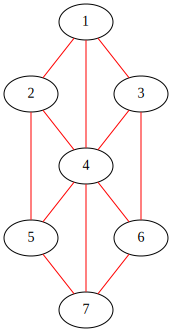

In [18]:
Source(read_dot_file("13"))

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\14.dot
digraph G {
edge [dir=none, color=red];
1 -> 2 [label = 6.2];
1 -> 3 [label = 1.2];
1 -> 4 [label = 5.0];
2 -> 3 [label = 5.2];
2 -> 5 [label = 3.2];
3 -> 4 [label = 5.0];
3 -> 5 [label = 4.0];
3 -> 6 [label = 4.0];
4 -> 6 [label = 2.0];
5 -> 6 [label = 6.0];
}



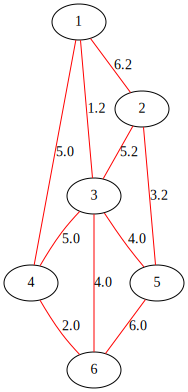

In [19]:
Source(read_dot_file("14"))

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\15.dot
digraph G {
edge [color=red];
A -> B;
B -> C;
E -> F;
E -> D;
D -> B;
C -> E;
}



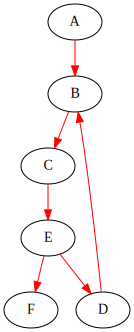

In [20]:
Source(read_dot_file("15"))

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\16.dot
digraph G {
edge [color=red];
A -> C [label = 12.8];
A -> D [label = 60.0];
C -> B [label = 20.0];
C -> D [label = 32.9];
B -> A [label = 10.0];
E -> A [label = 7.0];
}



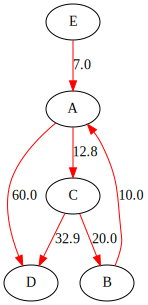

In [21]:
Source(read_dot_file("16"))

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\cat.dot
digraph G {
edge [color=red];
Bar -> Bat;
Cab -> Car;
Cab -> Cat;
Car -> Bar;
Mat -> Bat;
Cat -> Mat;
Cat -> Bat;
}



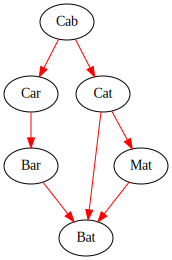

In [22]:
Source(read_dot_file("cat"))

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\loopparallel.dot
digraph G {
edge [color=red];
s -> 0 [label = 1.0];
0 -> 1 [label = 5.0];
1 -> t [label = 1.0];
}



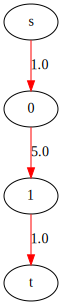

In [23]:
Source(read_dot_file("loopparallel"))

# DFS TRAVERSAL

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\u1dfs.dot
digraph G {
	label = "[0 1 ] NO LOOP";
	0[label = <0<BR /><FONT POINT-SIZE="10">1/4</FONT>>];
	1[label = <1<BR /><FONT POINT-SIZE="10">2/3</FONT>>];
edge [dir=none, color=red];
	0 -> 1;
}



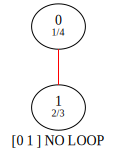

In [24]:
Source(read_dot_file("u1dfs"))

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\1dfs.dot
digraph G {
	label = "[1 3 5 4 2 ] NO LOOP";
	1[label = <1<BR /><FONT POINT-SIZE="10">1/10</FONT>>];
	3[label = <3<BR /><FONT POINT-SIZE="10">4/9</FONT>>];
	5[label = <5<BR /><FONT POINT-SIZE="10">7/8</FONT>>];
	4[label = <4<BR /><FONT POINT-SIZE="10">5/6</FONT>>];
	2[label = <2<BR /><FONT POINT-SIZE="10">2/3</FONT>>];
edge [dir=none, color=red];
	1 -> 2;
	1 -> 3;
	3 -> 4;
	3 -> 5;
}



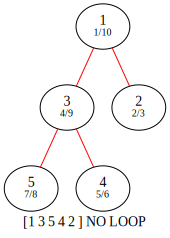

In [25]:
Source(read_dot_file("1dfs"))

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\udf1dfs.dot
digraph G {
	label = "[0 1 3 5 4 2 ] LOOP";
	0[label = <0<BR /><FONT POINT-SIZE="10">1/12</FONT>>];
	1[label = <1<BR /><FONT POINT-SIZE="10">2/11</FONT>>];
	3[label = <3<BR /><FONT POINT-SIZE="10">3/10</FONT>>];
	5[label = <5<BR /><FONT POINT-SIZE="10">4/9</FONT>>];
	4[label = <4<BR /><FONT POINT-SIZE="10">5/8</FONT>>];
	2[label = <2<BR /><FONT POINT-SIZE="10">6/7</FONT>>];
edge [color=red];
	0 -> 1;
	1 -> 3;
	3 -> 5;
	3 -> 2;
	5 -> 4;
	4 -> 2;
	2 -> 0;
}



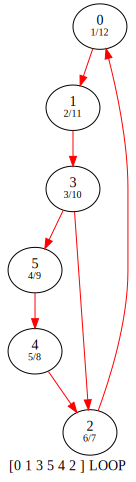

In [26]:
Source(read_dot_file("udf1dfs"))

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\2dfs.dot
digraph G {
	label = "[1 3 2 4 5 ] NO LOOP";
	1[label = <1<BR /><FONT POINT-SIZE="10">1/10</FONT>>];
	3[label = <3<BR /><FONT POINT-SIZE="10">8/9</FONT>>];
	2[label = <2<BR /><FONT POINT-SIZE="10">2/7</FONT>>];
	4[label = <4<BR /><FONT POINT-SIZE="10">3/6</FONT>>];
	5[label = <5<BR /><FONT POINT-SIZE="10">4/5</FONT>>];
edge [color=red];
	1 -> 2;
	1 -> 3;
	2 -> 4;
	3 -> 4;
	4 -> 5;
}



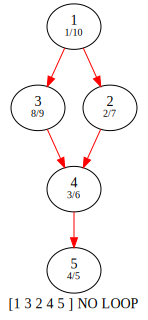

In [27]:
Source(read_dot_file("2dfs"))

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\3dfs.dot
digraph G {
	label = "[0 1 3 4 2 ] LOOP";
	0[label = <0<BR /><FONT POINT-SIZE="10">1/10</FONT>>];
	1[label = <1<BR /><FONT POINT-SIZE="10">2/9</FONT>>];
	3[label = <3<BR /><FONT POINT-SIZE="10">3/8</FONT>>];
	4[label = <4<BR /><FONT POINT-SIZE="10">4/7</FONT>>];
	2[label = <2<BR /><FONT POINT-SIZE="10">5/6</FONT>>];
edge [color=red];
	0 -> 1;
	0 -> 2;
	1 -> 3;
	2 -> 3;
	3 -> 4;
	4 -> 2;
}



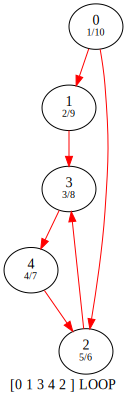

In [28]:
Source(read_dot_file("3dfs"))

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\catdfs.dot
digraph G {
	label = "[Cab Cat Mat Car Bar Bat ] NO LOOP";
	Cab[label = <Cab<BR /><FONT POINT-SIZE="10">5/12</FONT>>];
	Cat[label = <Cat<BR /><FONT POINT-SIZE="10">8/11</FONT>>];
	Mat[label = <Mat<BR /><FONT POINT-SIZE="10">9/10</FONT>>];
	Car[label = <Car<BR /><FONT POINT-SIZE="10">6/7</FONT>>];
	Bar[label = <Bar<BR /><FONT POINT-SIZE="10">1/4</FONT>>];
	Bat[label = <Bat<BR /><FONT POINT-SIZE="10">2/3</FONT>>];
edge [color=red];
	Bar -> Bat;
	Cab -> Car;
	Cab -> Cat;
	Car -> Bar;
	Mat -> Bat;
	Cat -> Mat;
	Cat -> Bat;
}



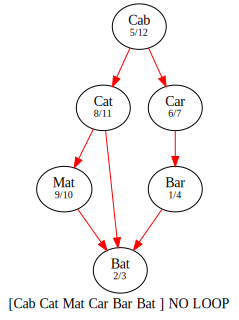

In [29]:
Source(read_dot_file("catdfs"))

C:\Users\ruchi\Coursework\PSA\Assignments\AssignmentGraph\dot\7dfs.dot
digraph G {
	label = "[0 3 1 2 4 5 6 ] NO LOOP";
	0[label = <0<BR /><FONT POINT-SIZE="10">1/14</FONT>>];
	3[label = <3<BR /><FONT POINT-SIZE="10">10/13</FONT>>];
	1[label = <1<BR /><FONT POINT-SIZE="10">11/12</FONT>>];
	2[label = <2<BR /><FONT POINT-SIZE="10">2/9</FONT>>];
	4[label = <4<BR /><FONT POINT-SIZE="10">7/8</FONT>>];
	5[label = <5<BR /><FONT POINT-SIZE="10">3/6</FONT>>];
	6[label = <6<BR /><FONT POINT-SIZE="10">4/5</FONT>>];
edge [color=red];
	0 -> 2;
	0 -> 3;
	0 -> 1;
	2 -> 5;
	2 -> 4;
	3 -> 2;
	3 -> 4;
	3 -> 1;
	1 -> 6;
	1 -> 4;
	4 -> 6;
	5 -> 6;
}



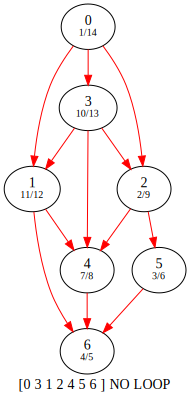

In [30]:
Source(read_dot_file("7dfs"))